## Home-Price

price = m1* area + m2* bedrooms + m3* age + b

In [57]:
import pandas as pd
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\\Aung Thiha\\Machine Learning With Python\\Machine Learning DataSets (csv format)\\homeprices.csv")

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

reg = linear_model.LinearRegression()

reg.fit(df[["area","bedrooms","age"]],df.price)

#plt.scatter(df[["area","bedrooms","age"]],df.price,color="red")
#plt.plot(df[["area","bedrooms","age"]],df.price,color="yellow")
#plt.plot(df.area,reg.predict(df[["area","bedrooms","age"]]),color="red")

print("Accurancy Score is ",reg.score(df[["area","bedrooms","age"]],df.price)*100,"%")
print("Predict Value is ",reg.predict([[3000,4,15]]))
df

Accurancy Score is  95.50196399325819 %
Predict Value is  [602590.07937407]


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Hiring

https://w2n.readthedocs.io/en/latest/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply

In [58]:
import math
from word2number import w2n
import pandas as pd
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\Users\\Aung Thiha\\Machine Learning With Python\\Machine Learning DataSets (csv format)\\hiring.csv")

# Data pre-processing
df_mean = df['test_score(out of 10)'].mean()
df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(w2n.word_to_num)
df = df.fillna(math.floor(df_mean))

reg = linear_model.LinearRegression()

reg.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df['salary($)'])

print("Predict Value is ",reg.predict([[2,9,6]]))
print("Predict Value is ",reg.predict([[12,10,10]]))
df

Predict Value is  [53713.86677124]
Predict Value is  [93747.79628651]


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


## Weight-Height

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:\\Users\\Aung Thiha\\Machine Learning With Python\\Machine Learning DataSets (csv format)\\weight_height.csv")

print(df.isnull().sum())

gender = LabelEncoder()

df["Gender"] = gender.fit_transform(df["Gender"])

inputs = df.drop(["Weight"],axis = "columns")
target = df["Weight"]

model = LinearRegression()

#X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.09 , random_state=10)
#model.fit(X_train,y_train)

model.fit(inputs,target)

print("Accurancy Score is ",model.score(inputs,target)*100,"%")
#print("Accurancy Score is ",model.score(X_test,y_test)*100,"%")

print("Predict Value is ",model.predict([[0,66.172652]]))
df

Gender    0
Height    0
Weight    0
dtype: int64
Accurancy Score is  90.27481729205304 %
Predict Value is  [150.58654938]


,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


# Data Visualization

### Weight-Height

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

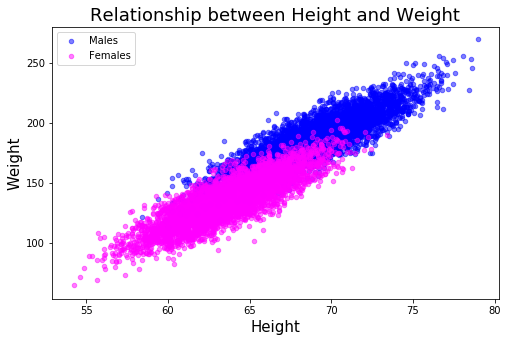

In [2]:
ax1=df[df['Gender']==1].plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(8,5))
ax2 = df[df['Gender']==0].plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(8,5),ax=ax1)

plt.legend(labels=["Males","Females"])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel("Height",size=15)
plt.ylabel("Weight",size=15)
plt.show()